<a href="https://colab.research.google.com/github/Anagha1602/Machine-Learning/blob/main/CNN_CIFAR_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input,Conv2D,MaxPooling2D, Flatten,Dense, Dropout
from keras.models import Model
from keras import layers,models
from keras.datasets import cifar100
from keras.utils import to_categorical

169001437/169001437 [==============================] - 11s 0us/step


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]], dtype=uint8)
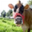

In [ ]:
(train_images,train_labels),(test_images,test_labels)=cifar100.load_data()
train_images[0]

In [ ]:
# Data Normalisation
train_images,test_images=train_images/255.0,test_images/255.0
train_images[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.76470588, 0.80392157, 0.75686275],
        [0.83137255, 0.87843137, 0.8       ],
        [0.71372549, 0.76078431, 0.65490196]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.66666667, 0.69019608, 0.58823529],
        [0.63137255, 0.65882353, 0.50980392],
        [0.57254902, 0.60392157, 0.44313725]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.74117647, 0.78039216, 0.6627451 ],
        [0.65098039, 0.69803922, 0.50980392],
        [0.4745098 , 0.52156863, 0.34117647]],

       ...,

       [[0.58039216, 0.7254902 , 0.30980392],
        [0.55686275, 0.71372549, 0.22352941],
        [0.54901961, 0

In [ ]:
#One-hot encoding
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
input_layer=Input(shape=(32,32,3))

conv1=Conv2D(32,(3,3),activation='relu')(input_layer)
maxpooling1=MaxPooling2D(2,2)(conv1)
dropout1=Dropout(0.25)(maxpooling1)

conv2=Conv2D(64,(3,3),activation='relu')(dropout1)
maxpooling2=MaxPooling2D(2,2)(conv2)
dropout2=Dropout(0.25)(maxpooling2)

conv3=Conv2D(64,(3,3),activation='relu')(dropout2)
maxpooling3=MaxPooling2D(2,2)(conv3)
dropout3=Dropout(0.25)(maxpooling3)

conv4=Conv2D(64,(2,2),activation='relu')(dropout3)
flatten=Flatten()(conv4)
dense1=Dense(64,activation='relu')(flatten)
output_layer=Dense(100,activation='softmax')(dense1)







In [ ]:
model=Model(inputs=input_layer,outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                        

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=5,batch_size=10,validation_split=0.2)

Epoch 1/5
4000/4000 [==============================] - 81s 20ms/step - loss: 4.1640 - accuracy: 0.0540 - val_loss: 3.9447 - val_accuracy: 0.0895
Epoch 2/5
4000/4000 [==============================] - 76s 19ms/step - loss: 3.7700 - accuracy: 0.1135 - val_loss: 3.6477 - val_accuracy: 0.1367
Epoch 3/5
4000/4000 [==============================] - 106s 27ms/step - loss: 3.5577 - accuracy: 0.1477 - val_loss: 3.4592 - val_accuracy: 0.1689
Epoch 4/5
4000/4000 [==============================] - 87s 22ms/step - loss: 3.4227 - accuracy: 0.1725 - val_loss: 3.4673 - val_accuracy: 0.1665
Epoch 5/5
4000/4000 [==============================] - 80s 20ms/step - loss: 3.3291 - accuracy: 0.1885 - val_loss: 3.3011 - val_accuracy: 0.2041


In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f'Accuracy on test data: {test_acc}')

313/313 [==============================] - 4s 12ms/step - loss: 3.2907 - accuracy: 0.2069
Accuracy on test data: 0.2069000005722046
